# **Advanced Data Science for Innovation - Assignment 1**


## NBA Career Prediction: Predict 5-Year Longevity for NBA Rookies
**Student Name:** Sean Williams

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenying Wu
* Nathan Fragar
* Sean Williams
* Carol Myhill

## Environment Setup

In [1]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
from importlib.machinery import SourceFileLoader
dataexp = SourceFileLoader('explore', '../src/data/explore.py').load_module()
dataprep = SourceFileLoader('prep', '../src/data/prepare.py').load_module()
from sklearn.preprocessing import MinMaxScaler

# 1. <u>Data Understanding</u>

## 1.1 Collect initial data

In [2]:
# Load training and test data sets into two seperate dataframes and define a variable to hold the name of the target column
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

---
## 1.2. Describe data

### 1.2.1 Display train dateset information

In [3]:
# Print summary information (Index, Columnn, Non-Null values and Datatype) of the training dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

In [4]:
# Define variable to store name of Target column
target_name = 'TARGET_5Yrs'

>**Observations:**
>* The training dataset contains 8000 observations
>* The target name is TARGET_5Yrs
>* The target is an Integer with no missing values
>* There are 20 features within the dataset (2 Integer and 18 Float)
>* There are no categorical features within the dataset
>* There are no null values across all features of the dataset

---
### 1.2.2 Display test dateset information

In [5]:
# Print summary information (Index, Columnn, Non-Null values and Datatype) of the test dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB


>**Observations:**
>* The test dataset contains 3799 observations
>* There is no target column
>* There are 20 features within the dataset (2 Integer and 18 Float).
>* Names and datatypes of features align with features availble in the training dataset
>* There are no categorical features within the dataset
>* There are no null values across all features of the dataset

---
### 1.2.3 Display first 20 rows of train dataset

In [6]:
df_train.head(20)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
5,1961,88,20.0,8.8,3.7,8.7,43.6,-0.2,-0.5,6.9,...,2.8,75.1,1.8,2.9,4.7,1.8,0.4,0.3,1.1,1
6,2677,70,20.6,7.0,3.2,5.4,58.9,0.1,-0.1,-3.6,...,1.4,56.7,2.9,4.6,7.6,0.6,0.4,0.7,1.2,1
7,11722,57,17.6,5.4,1.7,4.7,37.2,0.9,2.8,33.2,...,1.8,78.3,0.8,1.7,2.6,0.4,0.6,0.6,0.3,1
8,6148,46,26.5,9.3,3.1,7.2,44.0,0.6,1.7,27.5,...,2.3,82.1,1.3,2.8,4.1,1.8,0.7,0.6,1.7,1
9,3040,64,33.4,16.9,6.4,11.3,59.0,0.3,1.1,-13.0,...,4.9,74.9,3.4,8.0,11.9,0.8,0.4,2.5,2.4,1


>**Observations:**
>* Negative values noted in 3P Made, 3PA and 3P% features

---
### 1.2.4 Display first 20 rows of test dataset

In [7]:
df_test.head(20)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
5,6,59,16.1,7.1,2.8,4.5,62.0,-0.1,-0.6,3.4,1.7,2.7,58.6,1.8,2.6,4.6,0.6,0.6,0.4,0.9
6,8198,45,8.3,3.2,1.4,2.8,46.4,-0.5,-1.6,8.9,0.5,0.7,69.3,0.5,0.5,1.2,0.2,0.1,0.2,0.4
7,8202,53,12.1,4.7,1.8,4.1,44.1,0.1,0.2,25.7,0.9,1.0,80.2,0.6,1.1,1.6,0.8,0.4,-0.2,0.6
8,14,41,21.6,7.9,3.1,6.0,49.6,0.3,0.9,-14.8,1.8,2.2,77.6,2.4,2.6,5.1,1.4,0.5,0.4,1.4
9,8207,25,10.0,2.6,1.0,2.3,45.0,0.2,0.7,11.7,0.4,0.5,84.1,0.4,1.5,1.8,0.4,0.2,0.2,0.5


>**Observations:**
>* Negative values noted in 3P Made, 3PA, 3P% and BLK features

---
### 1.2.5 Display statistical information for all numeric features of train dataset

In [8]:
# Print descriptive statistics (count, mean, std deviation, min valu, 25percentile, 50percentile, 75percentilem max value) of the training dataframe
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


>**Observations:**
>* Minimum value confirms negative values noted in GP, 3P Made, 3PA, 3P%, FT% and BLK features

---
### 1.2.6 Display statistical information for all numeric features of test dataset

In [9]:
# Print descriptive statistics (count, mean, std deviation, min valu, 25percentile, 50percentile, 75percentilem max value) of the test dataframe
df_test.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,-0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


>**Observations:**
>* Minimum value confirms negative values noted in 3P Made, 3PA, 3P% and BLK features

---
## 1.3 Verify Data Quality

### 1.3.1 Display details of features with missing data in train dataset

In [10]:
# Print details of null values (count and percentage) of the training dataframe. This uses a custom function available in the dataexp pacakge
dataexp.print_na_info(df_train)

,feature,null_value_count,null_value_percent


>**Observations:**
>* No missing values in train data set

---
### 1.3.2 Display details of features with missing data in test dataset

In [11]:
# Print details of null values (count and percentage) of the test dataframe. This uses a custom function available in the dataexp pacakge
dataexp.print_na_info(df_test)

,feature,null_value_count,null_value_percent


>**Observations:**
>* No missing values in test data set

---
### 1.3.3 Check for any duplicate observations across all features in train dataset

In [12]:
# Print details of duplicate rows in the train dataframe.
df_train[df_train.duplicated()]

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs


>**Observation:**
>* There are no duplicate observations in the train dataset

---
### 1.3.4 Check for any duplicate values for the Id feature in train dataset

In [13]:
# Print details of duplicate values for the ID column in the train dataframe.
df_train[df_train.duplicated(['Id'])]

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs


>**Observations:**
>* There are no duplicate ID values in the train dataset

---
### 1.3.5 Check for any duplicate observations (across all features) in test dataset

In [14]:
# Print details of duplicate rows in the test dataframe.
df_test[df_test.duplicated()]

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV


>**Observations:**
>* There are no duplicate observations in the test dataset

---
### 1.3.6 Check for any duplicate values for the Id feature in the test dataset

In [15]:
# Print details of duplicate values for the ID column in the test dataframe.
df_test[df_test.duplicated(['Id'])]

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV


>**Observations:**
>* There are no duplicate ID values in the test dataset

---
### 1.3.7 Determine number of observations with negative values in train dataset

In [16]:
# Print details of negative values (count and percentage) of the train dataframe. This uses a custom function available in the dataexp pacakge
dataexp.print_negative_info(df_train)

,feature,negative_value_count,negative_value_percent
0,3PA,1658,20.7250
1,3P Made,1629,20.3625
2,BLK,1048,13.1000
3,3P%,878,10.9750
4,GP,2,0.0250
5,FT%,1,0.0125


>**Observations:**
>* High occurence of observations with negative 3PA, 3P Made, 3P% and BLK values. These basketball stats cannot be negative
>* GP negatives counts are low. Possible data issue. Drop rows from data set
>* FT% negative counts are low. Possible data issue. Drop rows from data set

---
### 1.3.8 Determine number of observations with negative values in test dataset

In [17]:
# Print details of negative values (count and percentage) of the test dataframe. This uses a custom function available in the dataexp pacakge
dataexp.print_negative_info(df_test)

,feature,negative_value_count,negative_value_percent
0,3P Made,775,20.400105
1,3PA,773,20.347460
2,BLK,456,12.003159
3,3P%,435,11.450382


>**Observations:**
>* High occurence of observations with negative 3P values and BLK values. 3 Point could be an important statistic in determining player longetivity so dropping column might not be desirable
>* No GP or FT% negative values.

---
## 1.4 Explore Data

### 1.4.1 Print and visualise frequency of target variable

In [18]:
print('Frequency of target variable in train dataset')
df_train['TARGET_5Yrs'].value_counts(normalize=True)

Frequency of target variable in train dataset


1    0.833625
0    0.166375
Name: TARGET_5Yrs, dtype: float64

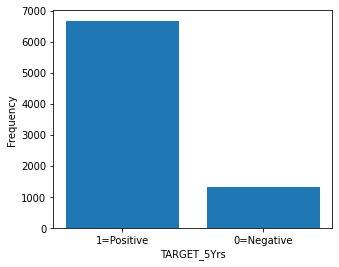

In [19]:
# Extract counts of target and store for bar graph plot
y_counts = df_train[target_name].value_counts()
# Define y axis labels
y_labels = ['1=Positive','0=Negative']
# Set figure size
plt.figure(figsize=(5,4))
# Set x and y axis labels
plt.xlabel(target_name)
plt.ylabel('Frequency')
# Plot and show the graph
plt.bar(y_labels, y_counts)
plt.show()

>**Observations:**
>* Data is heavily skewed to a Positive outcome (i.e. most players in the training dataset have had NBA careers lasting 5 years or more)

---
### 1.4.2 Print and visualise Correlation Coefficents of each feature to the Target variable

In [20]:
# Calculate and store correlation coefficents of each feature to the target
df_corrwith = df_train.corrwith(df_train[target_name]).abs().sort_values(ascending=False)
# Create a dataframe containing features and their correlation coefficents
df_feat_imp = pd.DataFrame ({
                  'feature': df_corrwith.index,
                  'correlation': df_corrwith.values
                 })
# Drop rows where correlation is 1
df_feat_imp.drop(df_feat_imp[df_feat_imp['correlation'] == 1].index, inplace=True)
df_feat_imp.reset_index(inplace=True, drop=True)
# Print dataframe
display(df_feat_imp)

,feature,correlation
0,GP,0.242108
1,FGM,0.183568
2,MIN,0.182203
3,PTS,0.182004
4,FTA,0.176525
5,REB,0.175627
6,FTM,0.173913
7,OREB,0.172604
8,DREB,0.168065
9,FGA,0.162389


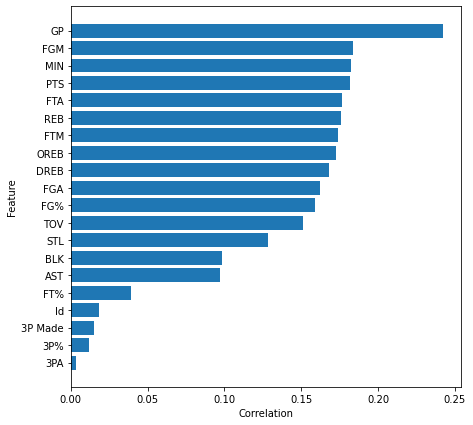

In [21]:
# Set figure size
plt.figure(figsize=(7,7))
# Set x and y axis labels
plt.xlabel('Correlation')
plt.ylabel('Feature')
# Plot and show the horizontal graph
plt.barh(df_feat_imp['feature'], df_feat_imp['correlation'])
plt.gca().invert_yaxis()
plt.show()

>**Observations:**
>* Correlation co-efficients show 13 features are highly corellated to the target
>* Feature Id display little correlation to target - feature should be dropped during modelling with regression algorithm
>* Features that were eariler identified as having  negative values (i.e. 3P Made, 3P% and 3PA) display little correlation to the target - feature should be dropped during modelling with regression algorithm

# 2. <u>Data Preparation</u>

**<u>The data preparation tasks identified are as follows</u>**
* Update features of observations with negative values to be the mean value of that feature
* Construct new features

   The features below have been borrowed from a Github blogpost attempting to predict Rookie Basketball Career Longetivity. 

    <u>True Shooting Percentage (TS%):</u>
       Definition: A statistic that measures a player’s efficiency at shooting the ball from Wikipedia
       Calculation: True Shooting Average (TSA) = FGA + (0.44*FTA)
                    True Shooting Percentage (TS%) = PTS/(2*TSA)


    <u>Turn Over Percentage (TOV%):<u>
       Definition: “An estimate of turnovers per 100 plays" from basketball-reference.com
       Calculation: Turnover Percentave (TOV%) = (TOV * 100) / (TSA + TOV)


    <u>Extra Possession (EXPOS):</u>
       Definition: "Combination of stats that changed the expected flow of the game to yield an "extra" possession
       Calculation: Extra Possession (EXPOS) = STL + BLK + OREB

* Drop ID column. Column identifies a player and has no relevance to modelling
* Create training sets that include all features as well as the highly correllated features (to be used in training a Logistic Regression model)
* Scale all features (for use in training Logistic Regression model)

## 2.1 Select Data

In [22]:
# Create a copy of the train dataset for data cleansing and preparation tasks
df_cleaned = df_train.copy()
df_cleaned_test = df_test.copy()

---
## 2.2 Clean data

### 2.2.1 Replace negative values in identified columns with mean

In [23]:
# Create a list of features that have negatives
negCols = ['3P Made','3PA','3P%','BLK','GP','FT%']
# Replace negative values with the mean value of the feature. This uses a custom function available in the dataprep package
df_cleaned = dataprep.replace_negatives(df_cleaned, negCols)
# Print descriptive statistical information to verify minumum values are no longer negative
df_cleaned[negCols].describe()

,3P Made,3PA,3P%,BLK,GP,FT%
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.400863,1.196689,22.907849,0.361392,62.794949,71.376410
std,0.261408,0.722410,12.726550,0.610009,17.084641,10.387394
min,0.000000,-0.000000,0.000000,0.000000,1.000000,13.500000
25%,0.200000,0.700000,13.500000,0.200000,51.000000,65.000000
50%,0.400863,1.196689,22.907849,0.300000,63.000000,71.400000
75%,0.500000,1.500000,30.600000,0.400000,74.000000,77.500000
max,1.700000,4.700000,82.100000,18.900000,123.000000,168.900000


In [24]:
# Replace negative values with the mean value of the feature. This uses a custom function available in the dataprep package
df_cleaned_test = dataprep.replace_negatives(df_cleaned_test, negCols)
# Print descriptive statistical information to verify minumum values are no longer negative
df_cleaned_test[negCols].describe()

,3P Made,3PA,3P%,BLK,GP,FT%
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,0.393056,1.174157,22.725684,0.352318,62.853909,71.612924
std,0.255098,0.705832,12.484915,0.538624,17.151740,10.457336
min,-0.000000,0.000000,-0.000000,0.000000,6.000000,23.700000
25%,0.200000,0.700000,13.600000,0.200000,51.000000,65.000000
50%,0.393056,1.174157,22.725684,0.300000,63.000000,71.500000
75%,0.500000,1.500000,30.250000,0.400000,74.000000,78.000000
max,1.600000,4.300000,73.800000,14.800000,126.000000,127.100000


>**Observations:**
>* The minimum values of the identified features are no longer negative across the train and test datasets

---
### 2.2.2 Construct New Features

#### 2.2.2.1 True Shooting Average

In [25]:
# Create a new feature called TSA
df_cleaned['TSA'] = ((df_cleaned['FGA'] + (0.44*df_cleaned['FTA']))).round(1)
# Print descriptive statistical information to verify newly created feature values
df_cleaned['TSA'].describe()

count    8000.000000
mean        7.088275
std         4.018663
min         0.900000
25%         4.100000
50%         6.300000
75%         9.200000
max        31.500000
Name: TSA, dtype: float64

In [26]:
# Create a new feature called TSA
df_cleaned_test['TSA'] = ((df_cleaned_test['FGA'] + (0.44*df_cleaned_test['FTA']))).round(1)
# Print descriptive statistical information to verify newly created feature values
df_cleaned_test['TSA'].describe()

count    3799.000000
mean        7.161937
std         4.014067
min         0.800000
25%         4.200000
50%         6.300000
75%         9.200000
max        30.500000
Name: TSA, dtype: float64

>**Observations:**
>* The mean and std. deviation between the train and test datasets for the new feature are well aligned

---
#### 2.2.2.2 True Shooting Percentage

In [27]:
# Create a new feature called TS%
df_cleaned['TS%'] = (((df_cleaned['PTS'] / (2*df_cleaned['TSA'])))*100).round(1)
# Print descriptive statistical information to verify newly created feature values
df_cleaned['TS%'].describe()

count    8000.000000
mean       50.642375
std         5.494163
min        31.800000
25%        47.000000
50%        50.600000
75%        54.200000
max        73.800000
Name: TS%, dtype: float64

In [28]:
# Create a new feature called TS%
df_cleaned_test['TS%'] = (((df_cleaned_test['PTS'] / (2*df_cleaned_test['TSA'])))*100).round(1)
# Print descriptive statistical information to verify newly created feature values
df_cleaned_test['TS%'].describe()

count    3799.000000
mean       50.627560
std         5.370325
min        32.400000
25%        47.100000
50%        50.600000
75%        54.200000
max        75.800000
Name: TS%, dtype: float64

>**Observations:**
>* The mean and std. deviation between the train and test datasets for the new feature are well aligned

---
#### 2.2.2.3 Turnover Percentage

In [29]:
# Create a new feature called TOV%
df_cleaned['TOV%'] = ((df_cleaned['TOV'] * 100) / (df_cleaned['TSA'] + df_cleaned['TSA'])).round(1)
# Print descriptive statistical information to verify newly created feature values
df_cleaned['TOV%'].describe()

count    8000.000000
mean        9.301975
std         3.269446
min         2.200000
25%         7.000000
50%         8.800000
75%        11.000000
max        35.000000
Name: TOV%, dtype: float64

In [30]:
# Create a new feature called TOV%
df_cleaned_test['TOV%'] = ((df_cleaned_test['TOV'] * 100) / (df_cleaned_test['TSA'] + df_cleaned_test['TSA'])).round(1)
# Print descriptive statistical information to verify newly created feature values
df_cleaned_test['TOV%'].describe()

count    3799.000000
mean        9.178021
std         3.126300
min         1.600000
25%         7.000000
50%         8.700000
75%        10.900000
max        35.700000
Name: TOV%, dtype: float64

>**Observations:**
>* The mean and std. deviation between the train and test datasets for the new feature are well aligned

---
#### 2.2.2.4 Extra Possession

In [31]:
# Create a new feature called EXPOS
df_cleaned['EXPOS'] = (df_cleaned['STL'] + df_cleaned['BLK'] + df_cleaned['OREB'])
# Print descriptive statistical information to verify newly created feature values
df_cleaned['EXPOS'].describe()

count    8000.000000
mean        2.087917
std         1.326281
min         0.100000
25%         1.200000
50%         1.800000
75%         2.600000
max        24.500000
Name: EXPOS, dtype: float64

In [32]:
# Create a new feature called EXPOS
df_cleaned_test['EXPOS'] = (df_cleaned_test['STL'] + df_cleaned_test['BLK'] + df_cleaned_test['OREB'])
# Print descriptive statistical information to verify newly created feature values
df_cleaned_test['EXPOS'].describe()

count    3799.000000
mean        2.101937
std         1.284022
min         0.100000
25%         1.252318
50%         1.800000
75%         2.600000
max        19.300000
Name: EXPOS, dtype: float64

>**Observations:**
>* The mean and std. deviation between the train and test datasets for the new feature are well aligned

---
### 2.2.3 Drop Unnessary Features

In [33]:
# Drop the Id feature from the dataframe
df_cleaned = dataprep.drop_features(df_cleaned, ['Id'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           8000 non-null   float64
 1   MIN          8000 non-null   float64
 2   PTS          8000 non-null   float64
 3   FGM          8000 non-null   float64
 4   FGA          8000 non-null   float64
 5   FG%          8000 non-null   float64
 6   3P Made      8000 non-null   float64
 7   3PA          8000 non-null   float64
 8   3P%          8000 non-null   float64
 9   FTM          8000 non-null   float64
 10  FTA          8000 non-null   float64
 11  FT%          8000 non-null   float64
 12  OREB         8000 non-null   float64
 13  DREB         8000 non-null   float64
 14  REB          8000 non-null   float64
 15  AST          8000 non-null   float64
 16  STL          8000 non-null   float64
 17  BLK          8000 non-null   float64
 18  TOV          8000 non-null   float64
 19  TARGET

In [34]:
# Drop the Id feature from the dataframe
df_cleaned_test = dataprep.drop_features(df_cleaned_test, ['Id'])
df_cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       3799 non-null   float64
 1   MIN      3799 non-null   float64
 2   PTS      3799 non-null   float64
 3   FGM      3799 non-null   float64
 4   FGA      3799 non-null   float64
 5   FG%      3799 non-null   float64
 6   3P Made  3799 non-null   float64
 7   3PA      3799 non-null   float64
 8   3P%      3799 non-null   float64
 9   FTM      3799 non-null   float64
 10  FTA      3799 non-null   float64
 11  FT%      3799 non-null   float64
 12  OREB     3799 non-null   float64
 13  DREB     3799 non-null   float64
 14  REB      3799 non-null   float64
 15  AST      3799 non-null   float64
 16  STL      3799 non-null   float64
 17  BLK      3799 non-null   float64
 18  TOV      3799 non-null   float64
 19  TSA      3799 non-null   float64
 20  TS%      3799 non-null   float64
 21  TOV%     3799 

### 2.2.4 Print and visualise Correlation Coefficents of each feature (including new features) to the Target variable

In [35]:
# Calculate and store correlation coefficents of each feature to the target
df_corrwith = df_cleaned.corrwith(df_cleaned[target_name]).abs().sort_values(ascending=False)
# Create a dataframe containing features and their correlation coefficents
df_feat_imp = pd.DataFrame ({
                  'feature': df_corrwith.index,
                  'correlation': df_corrwith.values
                 })
# Drop rows where correlation is 1
df_feat_imp.drop(df_feat_imp[df_feat_imp['correlation'] == 1].index, inplace=True)
df_feat_imp.reset_index(inplace=True, drop=True)
# Print dataframe
display(df_feat_imp)

,feature,correlation
0,GP,0.241647
1,FGM,0.183568
2,MIN,0.182203
3,PTS,0.182004
4,FTA,0.176525
5,REB,0.175627
6,FTM,0.173913
7,OREB,0.172604
8,TSA,0.169008
9,DREB,0.168065


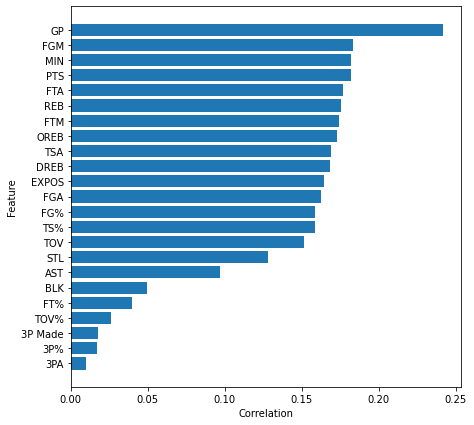

In [36]:
# Set figure size
plt.figure(figsize=(7,7))
# Set x and y axis labels
plt.xlabel('Correlation')
plt.ylabel('Feature')
# Plot and show the horizontal graph
plt.barh(df_feat_imp['feature'], df_feat_imp['correlation'])
plt.gca().invert_yaxis()
plt.show()

>**Observations:**
>* 3 of the 4 newly created features are highly correlated with the target variable. The top 16 correlated features will be selected for training a Logistic Regression model 

## 2.3 Construct Data

### 2.3.1 Scale Features

In [37]:
# Create a new dataframe with scaled features. This uses a custom function available in the dataprep pacakge
df_cleaned_scaled = dataprep.scale_features(df_cleaned, MinMaxScaler(), target_name)
df_cleaned_scaled.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,REB,AST,STL,BLK,TOV,TSA,TS%,TOV%,EXPOS,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.506516,0.221109,0.193625,0.195862,0.193282,0.507819,0.235802,0.254615,0.279024,0.171917,...,0.188801,0.126915,0.180191,0.019121,0.222647,0.202231,0.448628,0.216524,0.081472,0.833625
std,0.140038,0.126026,0.129303,0.132295,0.127564,0.134106,0.153769,0.153704,0.155013,0.114340,...,0.133664,0.105936,0.113229,0.032276,0.139090,0.131329,0.130813,0.099678,0.054356,0.372440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.409836,0.128350,0.098802,0.101562,0.099644,0.416122,0.117647,0.148936,0.164434,0.086420,...,0.089744,0.054688,0.083333,0.010582,0.115385,0.104575,0.361905,0.146341,0.045082,1.000000
50%,0.508197,0.196051,0.164671,0.164062,0.163701,0.503268,0.235802,0.254615,0.279024,0.148148,...,0.160256,0.101562,0.166667,0.015873,0.192308,0.176471,0.447619,0.201220,0.069672,1.000000
75%,0.598361,0.290550,0.260479,0.265625,0.259786,0.596950,0.294118,0.319149,0.372716,0.234568,...,0.256410,0.171875,0.250000,0.021164,0.288462,0.271242,0.533333,0.268293,0.102459,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# Create a new dataframe with scaled features. This uses a custom function available in the dataprep pacakge
df_cleaned_test_scaled = dataprep.scale_features(df_cleaned_test, MinMaxScaler(), None)
df_cleaned_test_scaled.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,DREB,REB,AST,STL,BLK,TOV,TSA,TS%,TOV%,EXPOS
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,...,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,0.473783,0.232507,0.205202,0.193542,0.216637,0.393921,0.245660,0.273060,0.307936,0.179467,...,0.167754,0.163505,0.181831,0.242072,0.023805,0.227041,0.214207,0.419990,0.222229,0.104268
std,0.142931,0.135727,0.132964,0.128888,0.140914,0.122024,0.159436,0.164147,0.169172,0.118736,...,0.116266,0.113772,0.148388,0.152064,0.036394,0.139696,0.135154,0.123740,0.091680,0.066876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.132193,0.108359,0.099237,0.114173,0.311111,0.125000,0.162791,0.184282,0.089744,...,0.084746,0.082418,0.066667,0.148148,0.013514,0.117647,0.114478,0.338710,0.158358,0.060017
50%,0.475000,0.206843,0.176471,0.167939,0.185039,0.393939,0.245660,0.273060,0.307936,0.153846,...,0.144068,0.137363,0.144444,0.222222,0.020270,0.196078,0.185185,0.419355,0.208211,0.088542
75%,0.566667,0.304821,0.269350,0.259542,0.287402,0.472727,0.312500,0.348837,0.409892,0.243590,...,0.228814,0.219780,0.255556,0.333333,0.027027,0.294118,0.282828,0.502304,0.272727,0.130208
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
### 2.3.2 Split dataset into Train and Validation sets

In [39]:
# Split dataframe with cleaned and scaled features into train and validation datasets with 80/20 split.
X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled = dataprep.split_sets(df_cleaned_scaled, target_name)
# Split dataframe with cleaned  features into train and validation datasets with 80/20 split.
X_train, y_train, X_val, y_val = dataprep.split_sets(df_cleaned, target_name)

In [40]:
print('Observations in scaled train dataset = ' + str(y_train_scaled.shape))
print('Frequency of target variable in scaled train dataset')
y_train_scaled.value_counts(normalize=True)

Observations in scaled train dataset = (6400,)
Frequency of target variable in scaled train dataset


1    0.833594
0    0.166406
Name: TARGET_5Yrs, dtype: float64

In [41]:
print('Observations in scaled validation dataset = ' + str(y_val_scaled.shape))
print('Frequency of target variable in scaled validation dataset')
y_val_scaled.value_counts(normalize=True)

Observations in scaled validation dataset = (1600,)
Frequency of target variable in scaled validation dataset


1    0.83375
0    0.16625
Name: TARGET_5Yrs, dtype: float64

In [42]:
print('Observations in train dataset = ' + str(y_train.shape))
print('Frequency of target variable in train dataset')
y_train.value_counts(normalize=True)

Observations in train dataset = (6400,)
Frequency of target variable in train dataset


1    0.833594
0    0.166406
Name: TARGET_5Yrs, dtype: float64

In [43]:
print('Observations in validation dataset = ' + str(y_val.shape))
print('Frequency of target variable in validation dataset')
y_val.value_counts(normalize=True)

Observations in validation dataset = (1600,)
Frequency of target variable in validation dataset


1    0.83375
0    0.16625
Name: TARGET_5Yrs, dtype: float64

>**Observations:**
>* Distribution of target variable consistent across all train and validation datasets and consistent with original dataset

---
### 2.3.3 Save datasets for modelling

In [44]:
lr_features=['GP','FGM','MIN','PTS','FTA','REB','FTM','OREB','TSA','DREB','EXPOS','FGA','FG%','TS%','TOV','STL']
xgb_features=['GP','TS%','FG%','3P%','TOV%','FT%','MIN','EXPOS','AST']
dataprep.save_sets(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, None, None, 'scaled')
dataprep.save_sets(X_train_scaled[lr_features], y_train_scaled, X_val_scaled[lr_features], y_val_scaled, None, None, 'scaled_lr_features')
dataprep.save_sets(X_train, y_train, X_val, y_val)
dataprep.save_sets(X_train[xgb_features], y_train, X_val[xgb_features], y_val, None, None, 'xgb_features')
dataprep.save_sets(df_cleaned_test_scaled, None, None, None, None, None, 'test_scaled')
dataprep.save_sets(df_cleaned_test_scaled[lr_features], None, None, None, None, None, 'test_scaled_lr_features')
dataprep.save_sets(df_cleaned_test, None, None, None, 'test')
dataprep.save_sets(df_cleaned_test[xgb_features], None, None, y_val, None, None, 'test_xgb_features')